In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tabular-playground-series-aug-2021/sample_submission.csv
/kaggle/input/tabular-playground-series-aug-2021/train.csv
/kaggle/input/tabular-playground-series-aug-2021/test.csv


In [2]:
train_df = pd.read_csv("/kaggle/input/tabular-playground-series-aug-2021/train.csv")
train_df.head()

,id,f0,f1,f2,f3,f4,f5,f6,f7,f8,...,f91,f92,f93,f94,f95,f96,f97,f98,f99,loss
0,0,-0.002350,59,0.766739,-1.350460,42.2727,16.68570,30.3599,1.267300,0.392007,...,-42.43990,26.854000,1.45751,0.696161,0.941764,1.828470,0.924090,2.29658,10.48980,15
1,1,0.784462,145,-0.463845,-0.530421,27324.9000,3.47545,160.4980,0.828007,3.735860,...,-184.13200,7.901370,1.70644,-0.494699,-2.058300,0.819184,0.439152,2.36470,1.14383,3
2,2,0.317816,19,-0.432571,-0.382644,1383.2600,19.71290,31.1026,-0.515354,34.430800,...,7.43721,37.218100,3.25339,0.337934,0.615037,2.216760,0.745268,1.69679,12.30550,6
3,3,0.210753,17,-0.616454,0.946362,-119.2530,4.08235,185.2570,1.383310,-47.521400,...,9.66778,0.626942,1.49425,0.517513,-10.222100,2.627310,0.617270,1.45645,10.02880,2
4,4,0.439671,20,0.968126,-0.092546,74.3020,12.30650,72.1860,-0.233964,24.399100,...,290.65700,15.604300,1.73557,-0.476668,1.390190,2.195740,0.826987,1.78485,7.07197,1


In [3]:
train_df.describe()

,id,f0,f1,f2,f3,f4,f5,f6,f7,f8,...,f91,f92,f93,f94,f95,f96,f97,f98,f99,loss
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,...,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,124999.500000,0.511213,51.378476,0.107155,0.050010,3595.133426,8.205953,164.508753,0.375533,16.669745,...,4856.812768,22.579100,2.030554,0.079692,1.555097,2.417556,0.537484,1.576900,8.048805,6.813920
std,72168.927986,0.307884,42.396636,1.322200,0.792368,6072.401061,5.475723,183.335563,0.813597,99.758709,...,8501.609009,14.849390,0.900211,0.587780,9.253785,0.892563,0.226589,0.646306,5.647368,7.940179
min,0.000000,-0.069273,-17.000000,-7.895580,-1.475560,-7589.280000,-3.291050,-40.967200,-4.143080,-502.813000,...,-12695.700000,-4.059170,0.057800,-1.998800,-24.686300,-1.131980,0.005249,-0.646967,-0.842397,0.000000
25%,62499.750000,0.251287,18.000000,-0.611172,-0.719418,163.864750,4.110127,27.894900,-0.026245,-17.392025,...,73.203100,11.525450,1.471650,-0.408975,-4.004925,1.906718,0.359646,1.215810,3.732800,1.000000
50%,124999.500000,0.514962,41.000000,0.253815,0.004099,943.000500,7.472445,91.005250,0.619862,8.714945,...,1060.025000,19.993200,1.660830,0.215710,0.759942,2.340430,0.531348,1.451285,7.182205,4.000000
75%,187499.250000,0.777323,75.000000,0.759249,0.765456,4115.355000,11.030950,240.843750,0.933855,55.407625,...,5572.982500,32.271625,2.320085,0.503134,6.202502,2.910020,0.709807,1.901632,10.998550,10.000000
max,249999.000000,1.072070,273.000000,9.768590,1.680190,37847.500000,35.078000,947.143000,4.010380,465.956000,...,54334.600000,79.912400,5.403020,1.944190,42.890400,5.576040,1.105400,4.492620,34.019200,42.000000


In [4]:
print('# of features = ', len(train_df.columns), '\n')
train_df.columns

# 100 features, drop 'id', TV is 'loss'

# of features =  102 



Index(['id', 'f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8',
       ...
       'f91', 'f92', 'f93', 'f94', 'f95', 'f96', 'f97', 'f98', 'f99', 'loss'],
      dtype='object', length=102)

In [5]:
train_df.isnull().sum().max()

# No missing values

0

In [6]:
print('# of classes = ', len(train_df['loss'].value_counts()))
train_df['loss'].value_counts()

# of classes =  43


0     60144
2     22225
1     22069
3     15902
4     13371
5     12458
6     10697
7      8894
8      8264
9      7435
10     7242
11     6572
12     5718
13     4828
14     4182
15     3671
16     3580
17     3420
18     3354
19     3079
20     2878
21     2478
22     2203
23     1875
24     1722
25     1457
26     1385
27     1284
28     1129
29     1096
30     1057
31      899
32      852
33      663
34      570
35      485
36      361
37      266
38      135
39       62
40       24
41       11
42        3
Name: loss, dtype: int64

<AxesSubplot:>

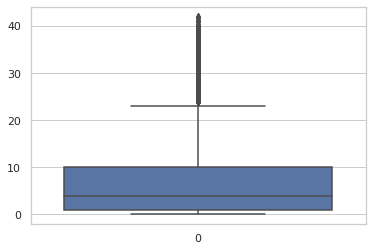

In [7]:
sns.set_theme(style="whitegrid")
sns.boxplot(data=train_df.loss)

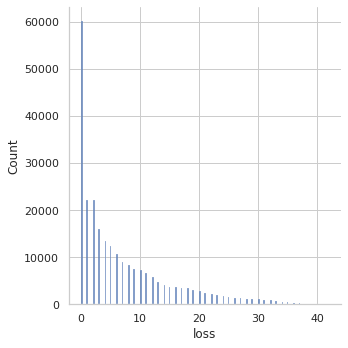

In [8]:
sns.displot(train_df.loss)

In [9]:
print(train_df.dtypes.value_counts())
train_df.dtypes

float64    95
int64       7
dtype: int64


id        int64
f0      float64
f1        int64
f2      float64
f3      float64
         ...   
f96     float64
f97     float64
f98     float64
f99     float64
loss      int64
Length: 102, dtype: object

In [10]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression, LogisticRegression
from catboost import CatBoostRegressor, CatBoostClassifier

In [11]:
features = list(train_df.columns[1:101])
train_cat = np.zeros((250000,))
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for fold, (train_idx, valid_idx) in enumerate(skf.split(train_df[features], train_df['loss'])):
    X_train, X_valid = train_df.iloc[train_idx], train_df.iloc[valid_idx]
    y_train = X_train['loss']
    y_valid = X_valid['loss']
    X_train = X_train.drop('loss', axis=1)
    X_valid = X_valid.drop('loss', axis=1)
    
    cbr = CatBoostRegressor(random_state=42)

    cbr =  cbr.fit(X_train, y_train, verbose=False)
    temp_cat = cbr.predict(X_valid)
    train_cat[valid_idx] = temp_cat
    print(f'Fold {fold}: RMSE: ', mean_squared_error(y_valid, temp_cat, squared=False))
    
print(f'Cat-boost Accuracy: ', mean_squared_error(train_df['loss'], train_cat, squared=False))

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


Fold 0: RMSE:  7.850131501961838
Fold 1: RMSE:  7.853977292376181
Fold 2: RMSE:  7.860017958311294
Fold 3: RMSE:  7.863019950588626
Fold 4: RMSE:  7.857596789369385
Cat-boost Accuracy:  7.856949996784925


In [12]:
test_df = pd.read_csv("/kaggle/input/tabular-playground-series-aug-2021/test.csv")
test_cat = np.zeros((len(test_df),))

X_test = test_df
temp_cat = cbr.predict(X_test)
test_cat= temp_cat

temp_cat = cbr.predict(X_test)


# **Sample submission**

In [13]:
samp_sub = pd.read_csv('../input/tabular-playground-series-aug-2021/sample_submission.csv')
samp_sub['loss'] = test_cat
samp_sub.to_csv('cat_boost.csv', index = False)